In [17]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_synthetic_data(num_samples):
    X = []
    y = []
    for i in range(num_samples):
        random_image = np.random.rand(128, 128, 3) 
        X.append(random_image)
        
        edges = cv2.Canny((random_image * 255).astype(np.uint8), 100, 200)
        y.append(1 if np.mean(edges) > 0 else 0)
            
    return np.array(X), np.array(y)

X_train, y_train = create_synthetic_data(1000)
X_test, y_test = create_synthetic_data(200)     

# modelin egitilmesi00
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),  
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# modelin egitilmesi01
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# performans degerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8517 - loss: 0.1064 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Tahmin: Kenar Var
Kenar piksellerinin Sayisi: 1406
Toplam piksel Sayisi: 16384
Kenar yogunlugu: 8.58%


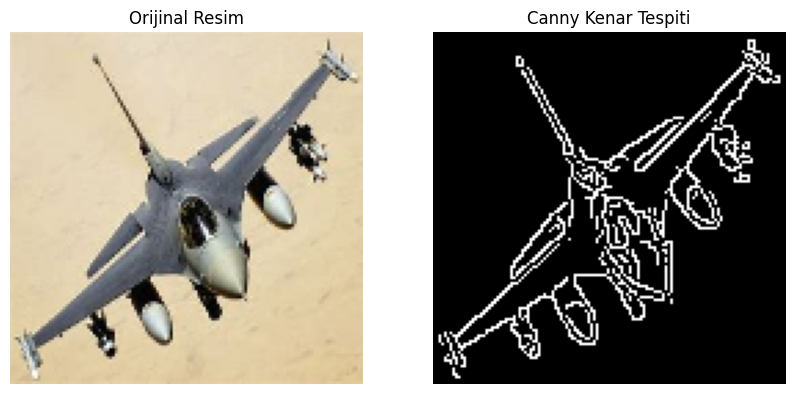

In [18]:
#test
custom_image_path = r"C:\Users\Taha\Desktop\ucak1.jpeg"
custom_image = cv2.imread(custom_image_path)

if custom_image is None:
    print(f"Hata: görüntü yüklenemedi - resmin yolu: {custom_image_path}")
else:
    custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)
    custom_image = cv2.resize(custom_image, (128, 128))
    custom_image = custom_image.astype(np.float32) / 255.0
    custom_image = np.expand_dims(custom_image, axis=0)

    prediction = model.predict(custom_image)
    predicted_class = 'Kenar Var' if prediction[0] > 0.5 else 'Kenar Yok'
    print(f"Tahmin: {predicted_class}")  # Tahmini yazdır

    # canny ile kenar tespiti  
    edges = cv2.Canny((custom_image[0] * 255).astype(np.uint8), 100, 200)

    #detayli kenar bilgisi
    num_edges = np.sum(edges > 0)
    total_pixels = edges.size  
    edge_density = (num_edges / total_pixels) * 100 

    print(f"Kenar piksellerinin Sayisi: {num_edges}")
    print(f"Toplam piksel Sayisi: {total_pixels}")
    print(f"Kenar yogunlugu: {edge_density:.2f}%")

    # görsel olarak
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(custom_image[0])
    plt.title("Orijinal Resim")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Kenar Tespiti")
    plt.axis('off')

    plt.show()

